In [38]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, exposure
from PIL import Image

from scipy.cluster.vq import kmeans2
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage import data
from skimage import color
from skimage.util.shape import view_as_windows
from skimage.util import montage

import matplotlib.pyplot as plt

from skimage.measure import label
from skimage import data
from skimage import color
from skimage.morphology import extrema
from skimage import exposure


(512, 512, 15)


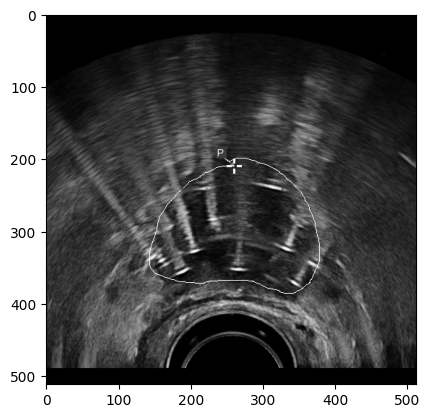

In [39]:


# Load the NIfTI file
nifti_file = nib.load(r"C:\Users\arkaniva\Downloads\pp.nii")

# Access the image data as a NumPy array
image_data = nifti_file.get_fdata()

# View shape of data
print(image_data.shape)

img = image_data[:,:,6].T

plt.imshow(img, cmap='gray')


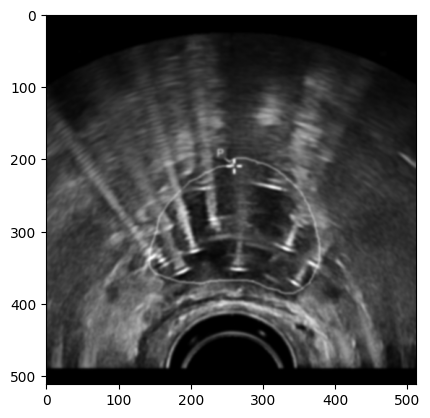

In [40]:
smoothened_img = filters.gaussian(img, sigma=1.5)

plt.imshow(smoothened_img, cmap='gray')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk

img2 = smoothened_img
img2 = img2/255

entr_img = entropy(img2, disk(2))

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

img0 = ax0.imshow(img2-entr_img, cmap='gray')
ax0.set_title("Object")
ax1.imshow(img2/(entr_img/np.max(entr_img)), cmap='gray')
ax1.set_title("Noisy image")
ax2.imshow(entr_img, cmap='viridis')
ax2.set_title("Local entropy")

fig.tight_layout()
plt.show()

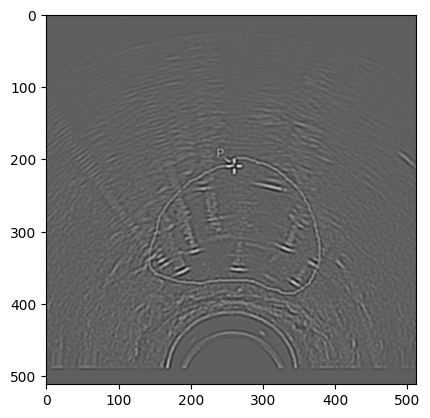

In [41]:

# Define parameters for Gabor filters
frequencies = [0.2]  # fine details for needle thickness
thetas = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # multiple orientations

# Apply Gabor filters at multiple orientations and accumulate response
filtered_real_sum = np.zeros_like(smoothened_img)
for theta in thetas:
    real, imag = filters.gabor(smoothened_img, frequency=frequencies[0], theta=theta)
    filtered_real_sum += real  # sum the real parts to enhance needle features

# Normalize summed response for display
filtered_real_sum = (filtered_real_sum - filtered_real_sum.min()) / (filtered_real_sum.max() - filtered_real_sum.min())

plt.imshow(filtered_real_sum, cmap='gray')


In [44]:
from PIL import Image
mip_image = Image.fromarray(smoothened_img)
mip_image.show()

1.0
1.0


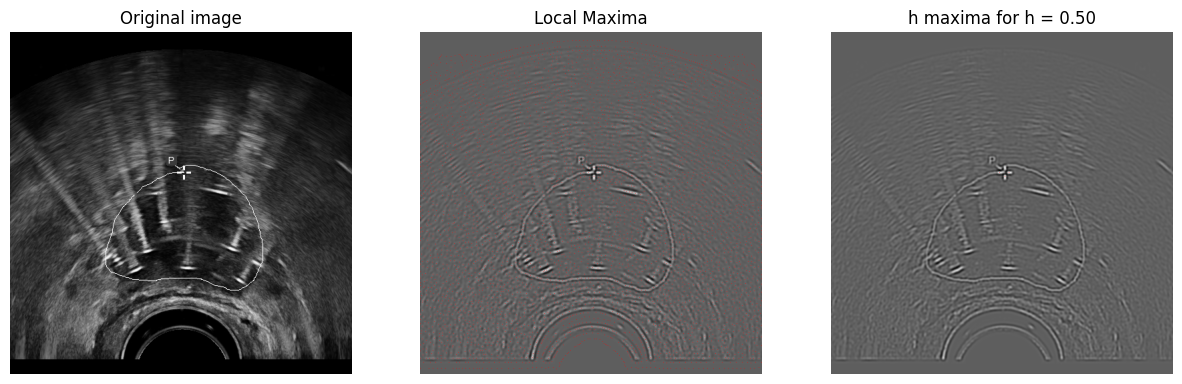

TypeError: Cannot handle this data type: (1, 1, 3), <f8

In [ ]:

print(np.max(filtered_real_sum))

filtered_real_sum = exposure.rescale_intensity(filtered_real_sum)
print(np.max(filtered_real_sum))
# We find all local maxima
local_maxima = extrema.local_maxima(filtered_real_sum)
label_maxima = label(local_maxima)
overlay = color.label2rgb(
    label_maxima, filtered_real_sum, alpha=0.7, bg_label=0, bg_color=None, colors=[(1, 0, 0)]
)

# We observed in the previous image, that there are many local maxima
h = 0.5
h_maxima = extrema.h_maxima(filtered_real_sum, h)
label_h_maxima = label(h_maxima)
overlay_h = color.label2rgb(
    label_h_maxima, filtered_real_sum, alpha=0.7, bg_label=0, bg_color=None, colors=[(1, 0, 0)]
)

# a new figure with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(overlay)
ax[1].set_title('Local Maxima')
ax[1].axis('off')

ax[2].imshow(overlay_h)
ax[2].set_title(f'h maxima for h = {h:.2f}')
ax[2].axis('off')
plt.show()



In [47]:
from PIL import Image
mip_image = Image.fromarray(img)
mip_image.show()

In [ ]:
# Blob detection algorithms
blobs_log = blob_log(morph_image, max_sigma=20, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

blobs_dog = blob_dog(morph_image, max_sigma=20, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)

blobs_doh = blob_doh(morph_image, max_sigma=20, threshold=.01)

blob_lists = [blobs_log, blobs_dog, blobs_doh]
colors = ['blue', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian', 'Determinant of Hessian']

# Plotting the results
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharex=True, sharey=True)
axis = axes.ravel()

for idx, (blobs, color, title) in enumerate(zip(blob_lists, colors, titles)):
    axis[idx].set_title(title)
    axis[idx].imshow(morph_image, interpolation='nearest')
    
    for blob in blobs:
        y, x, r = blob
        circle = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        axis[idx].add_patch(circle)
        
    axis[idx].set_axis_off()

In [ ]:
from skimage import io, color, exposure
from skimage.feature import hog
import matplotlib.pyplot as plt

# Load grayscale image
image = img/np.max(img)

# Adjust contrast if needed
image = exposure.equalize_adapthist(image)

# Compute HOG features with tuned parameters
hog_features, hog_image = hog(image,
                              orientations=18,                  # Finer gradient resolution
                              pixels_per_cell=(4, 4),           # Smaller cell to capture fine detail
                              cells_per_block=(2, 2),
                              block_norm='L2-Hys',
                              visualize=True,
                              feature_vector=True)

# Display
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Enhanced Ultrasound Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title("HOG - Needle Blob Features")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, exposure

# Load grayscale ultrasound axial slice
image = img/255

# Optional: enhance contrast for better detection
image_eq = exposure.equalize_adapthist(image)

# Apply Gaussian smoothing
image_eq = filters.gaussian(image_eq, sigma=3.0)  # try sigma=0.5 to 3.0 depending on image


# Define parameters for Gabor filters
frequencies = [0.2]  # fine details for needle thickness
thetas = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # multiple orientations

# Apply Gabor filters at multiple orientations and accumulate response
filtered_real_sum = np.zeros_like(image_eq)
for theta in thetas:
    real, imag = filters.gabor(image_eq, frequency=frequencies[0], theta=theta)
    filtered_real_sum += real  # sum the real parts to enhance needle features

# Normalize summed response for display
filtered_real_sum = (filtered_real_sum - filtered_real_sum.min()) / (filtered_real_sum.max() - filtered_real_sum.min())

# Plot original and filtered image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_eq, cmap='gray')
plt.title("Contrast-Enhanced TRUS Axial Slice")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_real_sum, cmap='gray')
plt.title("Gabor Filter Response (Multi-Orientation)")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

# Assuming filtered_real_sum is your normalized Gabor response image from before

# Compute Otsu threshold
otsu_thresh = threshold_otsu(filtered_real_sum)

# Create binary mask
binary_needle = filtered_real_sum > .5

# Plot filtered image and binary mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(filtered_real_sum, cmap='gray')
plt.title("Gabor Filter Response")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_needle, cmap='gray')
plt.title(f"Otsu Thresholding (threshold={otsu_thresh:.3f})")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

# Example data (replace with your filtered_real_sum array)
# filtered_real_sum should be a 2D numpy array with intensities
# For example:
# filtered_real_sum = np.random.rand(100, 100) 

x = np.arange(filtered_real_sum.shape[1])
y = np.arange(filtered_real_sum.shape[0])
X, Y = np.meshgrid(x, y)
Z = filtered_real_sum

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

ax.set_xlabel('X (pixels)')
ax.set_ylabel('Y (pixels)')
ax.set_zlabel('Intensity')
ax.set_title('3D Surface Plot of Filtered Real Sum')

fig.colorbar(surf, shrink=0.5, aspect=10, label='Intensity')

# This line opens the plot in a new interactive window (popup)
plt.show()


In [ ]:
import cv2
import numpy as np

def preprocess_for_trail(img):
    """
    - Denoise and enhance high‐frequency (speckle) trails.
    """
    # 1. Denoise
    denoised = cv2.fastNlMeansDenoising(img, None, h=8, templateWindowSize=7, searchWindowSize=21)

    # 2. High‐pass filter to accentuate speckle trails
    blurred = cv2.GaussianBlur(denoised, (15,15), 0)
    highpass = cv2.subtract(denoised, blurred)

    # 3. Contrast stretch
    p1, p99 = np.percentile(highpass, (1, 99))
    stretched = cv2.normalize(highpass, None, alpha=0, beta=255, 
                              norm_type=cv2.NORM_MINMAX,
                              dtype=cv2.CV_8U)
    return stretched

def detect_blob_heads(img):
    """
    Returns keypoints for needle‐head blobs.
    """
    # Set up LoG/DoG detector parameters
    params = cv2.SimpleBlobDetector_Params()
    params.filterByArea = True
    params.minArea = 20
    params.maxArea = 500
    params.filterByCircularity = True
    params.minCircularity = 0.6
    params.filterByInertia = False
    params.filterByConvexity = False
    params.minThreshold = 50
    params.maxThreshold = 255

    detector = cv2.SimpleBlobDetector_create(params)
    keypoints = detector.detect(img)
    # keypoint.pt gives (x,y) and keypoint.size gives blob diameter
    return keypoints


def trace_trail(img, keypoint, strip_width=10, min_trail_length=20, trail_thresh=30):
    """
    For a given blob keypoint, scan upward in a narrow strip and count speckles.
    Returns True if a trail is detected.
    """
    x, y = map(int, keypoint.pt)
    w = strip_width // 2
    h, _ = img.shape

    # Extract vertical strip above the blob
    y_top = max(0, y - min_trail_length - 10)
    strip = img[y_top:y, x-w:x+w]

    # Simple threshold to find speckles
    _, bw = cv2.threshold(strip, trail_thresh, 255, cv2.THRESH_BINARY)
    # Count connected components / white pixels
    count = cv2.countNonZero(bw)
    # Heuristic: enough speckles over the strip area
    if count > (strip.shape[0] * strip.shape[1] * 0.05):
        return True
    return False

if img.dtype != np.uint8:
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

raw = img

proc_trail = preprocess_for_trail(raw)
blobs = detect_blob_heads(raw)  # detect on original or lightly filtered image

# Create output visualization
vis = cv2.cvtColor(raw, cv2.COLOR_GRAY2BGR)
for kp in blobs:
    x,y = map(int, kp.pt)
    if trace_trail(proc_trail, kp):
        print(1)
        # Mark detected needle head + trail
        cv2.circle(vis, (x,y), int(kp.size/2)+2, (0,255,0), 2)
        cv2.line(vis, (x, y - 5), (x, max(0, y - 30)), (0,255,0), 1)

cv2.imshow("Needle Heads + Trails", vis)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("needle_detected.png", vis)


In [ ]:
import matplotlib.pyplot as plt
from skimage import io, color, filters
from skimage.filters import laplace, sobel, prewitt, roberts


# Convert to grayscale if necessary
gray_image = filters.gaussian(img, sigma=2.0)  # try sigma=0.5 to 3.0 depending on image


# Apply edge detection operators
sobel_edges = sobel(gray_image)
prewitt_edges = prewitt(gray_image)
roberts_edges = roberts(gray_image)
laplacian_edges = laplace(gray_image)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax = axes.ravel()

ax[0].imshow(sobel_edges, cmap='gray')
ax[0].set_title('Sobel Edge Detection')
ax[0].axis('off')

ax[1].imshow(prewitt_edges, cmap='gray')
ax[1].set_title('Prewitt Edge Detection')
ax[1].axis('off')

ax[2].imshow(roberts_edges, cmap='gray')
ax[2].set_title('Roberts Edge Detection')
ax[2].axis('off')

ax[3].imshow(laplacian_edges, cmap='gray')
ax[3].set_title('Laplacian Filter')
ax[3].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, morphology, segmentation, color
from skimage.segmentation import morphological_chan_vese, watershed
from skimage.filters import threshold_local, gaussian, sobel
from skimage.feature import peak_local_max
from skimage.measure import label
from skimage.util import img_as_float
from scipy import ndimage as ndi
from skimage import io

# --- Load and preprocess the TRUS image ---
# Replace with your actual image path
image = img
gray = img_as_float(image)

# Denoise and enhance contrast
smoothed = gaussian(gray, sigma=1)
equalized = filters.rank.equalize((smoothed * 255).astype(np.uint8), morphology.disk(20))

# --- WATERSHED SEGMENTATION ---

# Adaptive threshold to isolate bright blobs (needle tips)
block_size = 25
adaptive_thresh = threshold_local(equalized, block_size=block_size, offset=5)
binary = equalized > adaptive_thresh

# Morphological cleanup to suppress scattering and isolate blobs
closed = morphology.closing(binary, morphology.disk(5))
cleared = morphology.remove_small_objects(closed, min_size=100)

# Distance transform and markers
distance = ndi.distance_transform_edt(cleared)
# Get coordinates of peaks
coords = peak_local_max(distance, footprint=np.ones((15, 15)), labels=cleared)

# Create a marker mask from coordinates
local_maxi = np.zeros_like(distance, dtype=bool)
local_maxi[tuple(coords.T)] = True

markers = ndi.label(local_maxi)[0]

# Apply watershed
gradient = sobel(smoothed)
labels_ws = watershed(gradient, markers, mask=cleared)

# --- LEVEL SET SEGMENTATION ---

# Use the cleaned-up binary mask as initial level set
init_ls = morphology.binary_dilation(cleared, morphology.disk(3))

# Apply Morphological Chan-Vese
levelset = morphological_chan_vese(smoothed, num_iter=300, init_level_set=init_ls)

# --- PLOTTING ---

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(gray, cmap='gray')
ax[0].set_title('Original TRUS Image')
ax[0].axis('off')

ax[1].imshow(labels_ws, cmap='nipy_spectral')
ax[1].set_title('Watershed Segmentation')
ax[1].axis('off')

ax[2].imshow(gray, cmap='gray')
ax[2].contour(levelset, [0.5], colors='red')
ax[2].set_title('Level Set Segmentation')
ax[2].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from skimage import data

image = img

fig, ax = plt.subplots()
ax.imshow(image, cmap='gray')
coords = []

def onclick(event):
    if event.xdata and event.ydata:
        x, y = event.xdata, event.ydata
        print(f"Clicked at x={x:.2f}, y={y:.2f}")
        coords.append((x, y))
        ax.plot(x, y, 'ro')  # mark clicked point
        fig.canvas.draw()

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

print("All clicked points:", coords)


In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from skimage import io, filters, exposure, morphology, img_as_float

# Load your ultrasound image (grayscale)
image = img
image = img_as_float(image)

# Step 1: Denoise (Gaussian smoothing)
smoothed = filters.gaussian(image, sigma=1)

# Step 2: CLAHE (local contrast enhancement)
clahe = exposure.equalize_adapthist(smoothed, clip_limit=0.02)

# Step 3: Morphological opening to suppress upward scatterings
# Use a vertical line structuring element to remove thin vertical artifacts
selem = morphology.rectangle(15, 1)  # Tall and thin to remove vertical lines
opened = morphology.opening(clahe, selem)

# Step 4 (optional): Threshold to isolate bright needle blobs
thresh_val = filters.threshold_otsu(opened)
binary = opened > thresh_val

# Plot results
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Ultrasound')
ax[0].axis('off')

ax[1].imshow(clahe, cmap='gray')
ax[1].set_title('After CLAHE')
ax[1].axis('off')

ax[2].imshow(opened, cmap='gray')
ax[2].set_title('After Morph. Opening')
ax[2].axis('off')

ax[3].imshow(binary, cmap='gray')
ax[3].set_title('Thresholded Needles')
ax[3].axis('off')

plt.tight_layout()
plt.show()
